#### Exercise - preparation

##### Start by taking another look at the songs data.

##### 1. Create a boxplot, calling boxplot() for each column

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("nigerian-songs.csv")

<Axes: xlabel='release_date'>

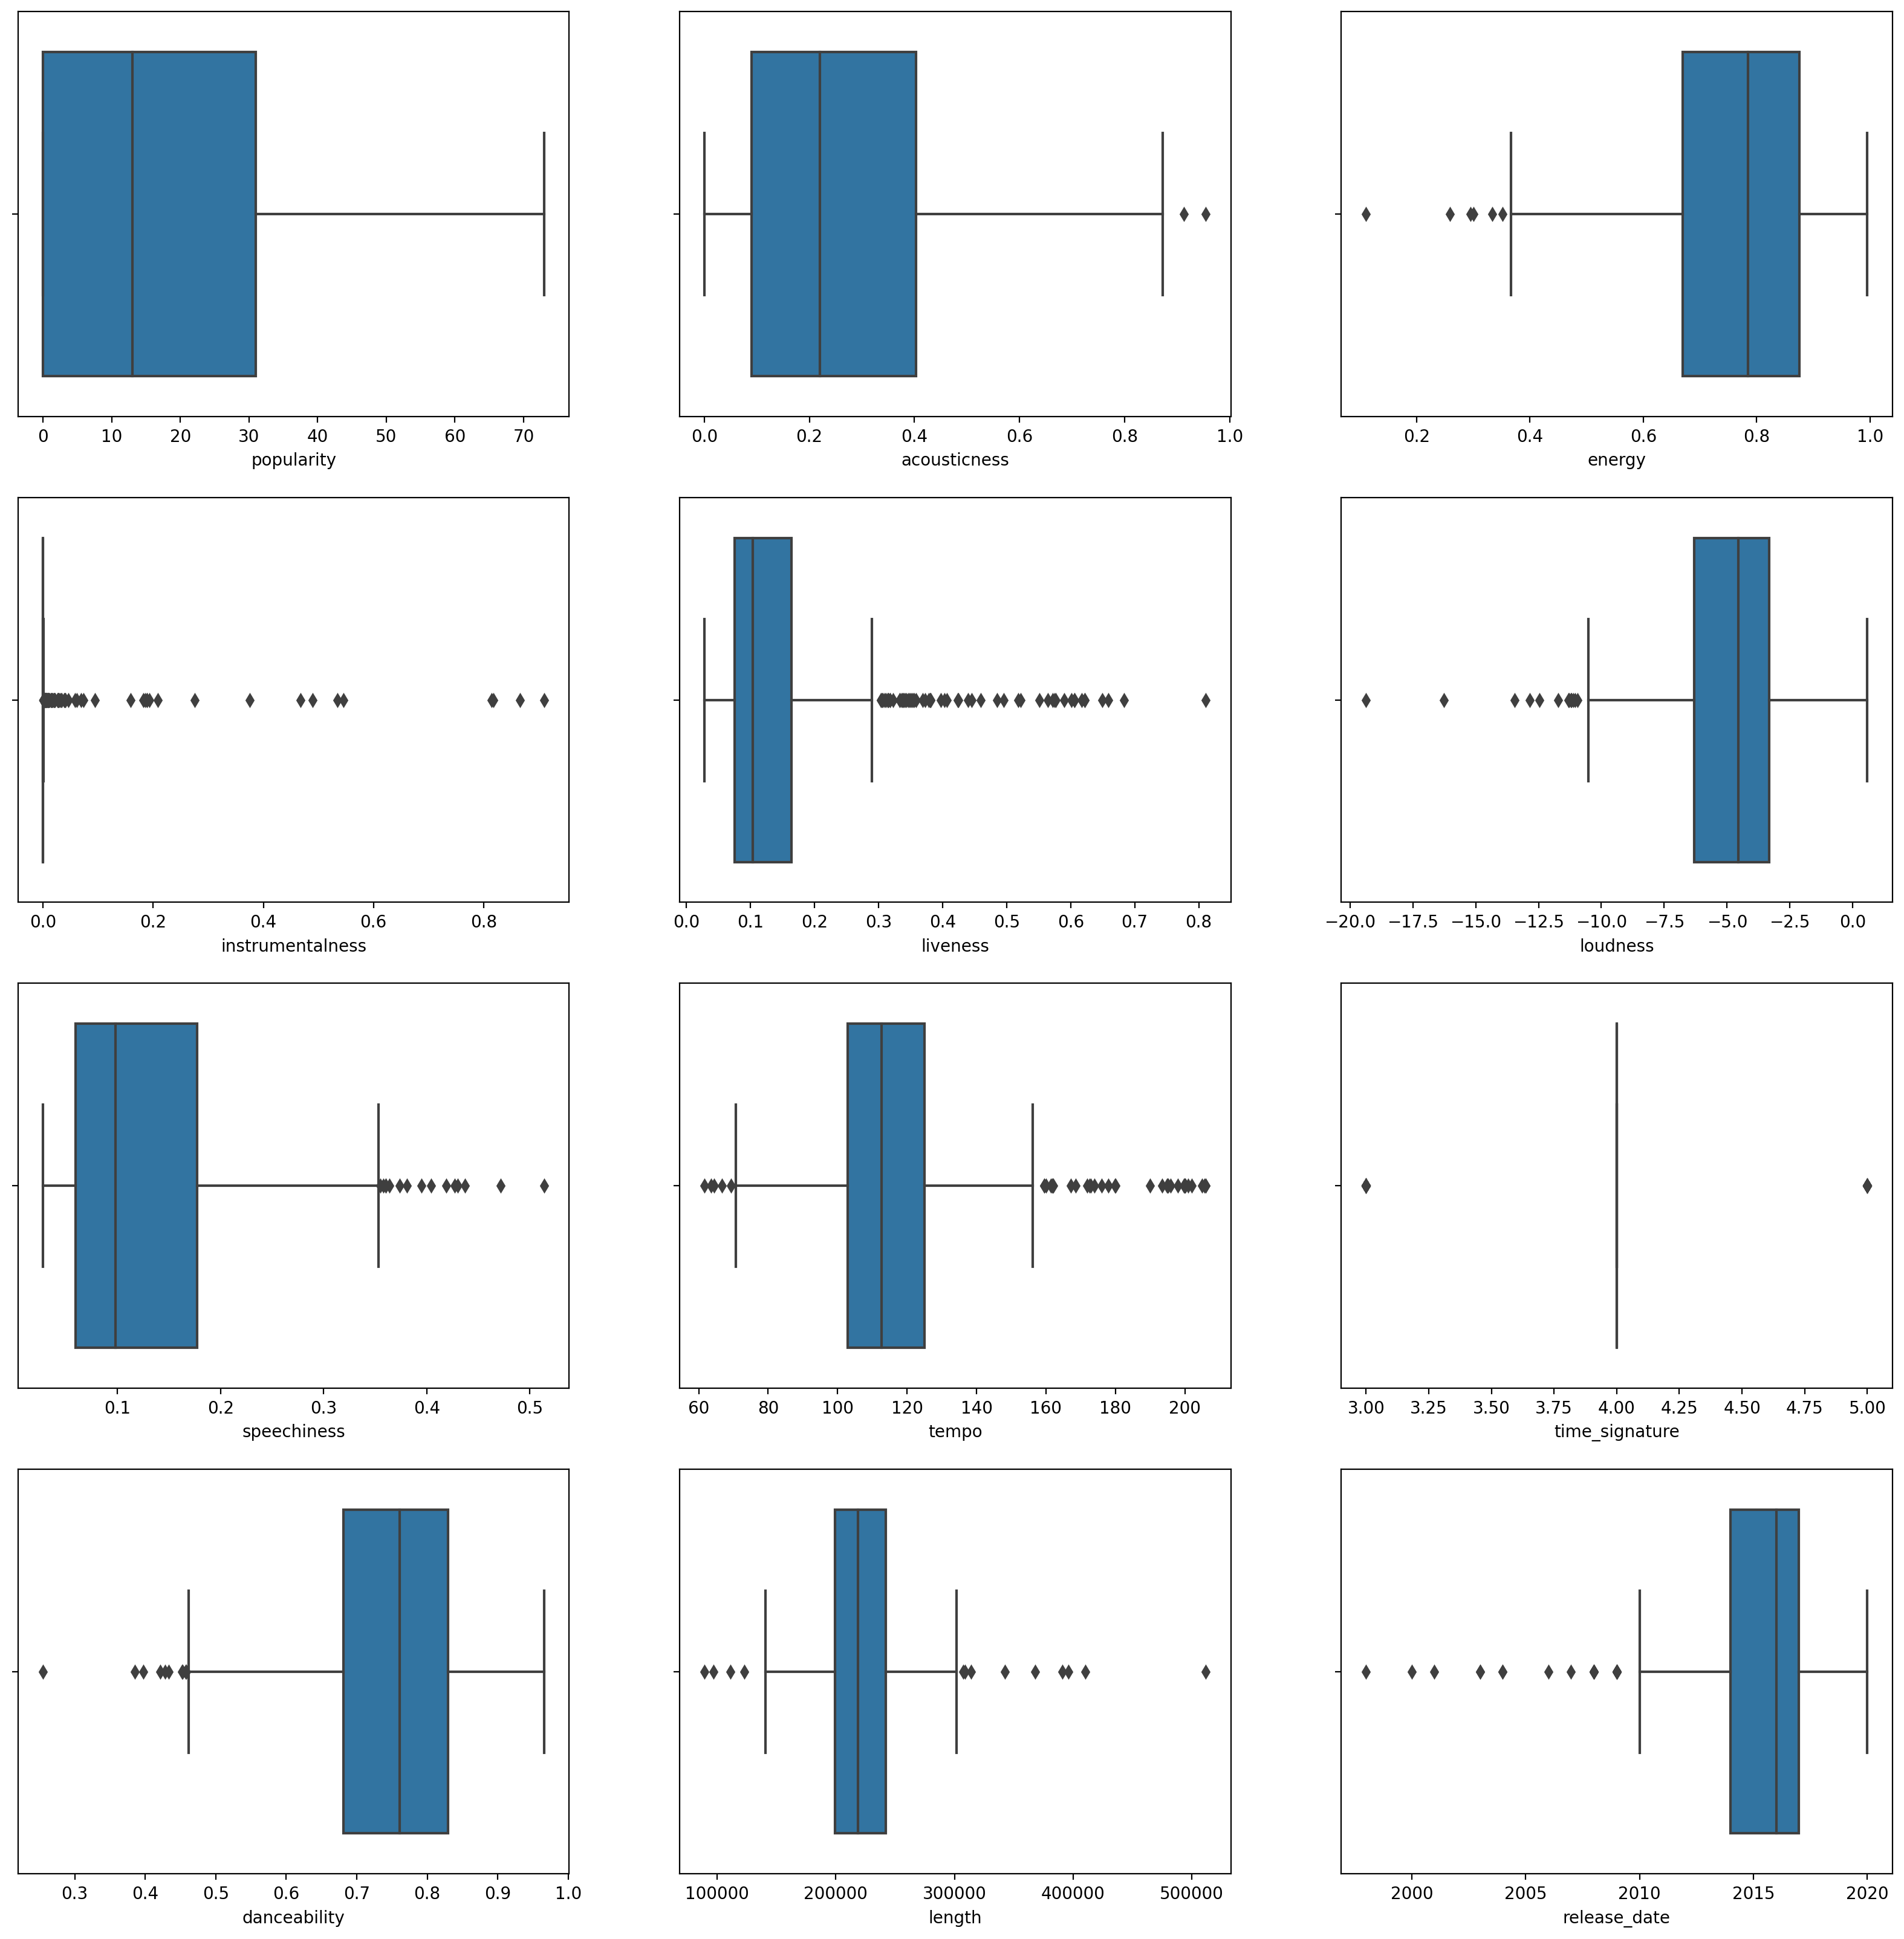

In [3]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

##### This data is a little noisy: by observing each column as a boxplot, you can see outliers.

##### You could go through the dataset and remove these outliers, but that would make the data pretty minimal.

##### 1. For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

##### 2. Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3.

In [5]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

c:\Users\RIDIKKO\anaconda3\envs\ArewaDS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIDIKKO\anaconda3\envs\ArewaDS\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

##### Therefore, an array is printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

##### 1. Use this array to calculate a 'silhouette score'.

In [6]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5918299843029218

### Silhouette score

##### Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters.

##### Our score is .59, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering, but let's continue.

#### Exercise - build a model

##### 1. Import KMeans and start the clustering process.

In [7]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


c:\Users\RIDIKKO\anaconda3\envs\ArewaDS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIDIKKO\anaconda3\envs\ArewaDS\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\RIDIKKO\anaconda3\envs\ArewaDS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIDIKKO\anaconda3\envs\ArewaDS\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

### Elbow method

##### Previously, we surmised that, because we have targeted 3 song genres, we should choose 3 clusters. But is that the case?

##### 1. We now use the 'elbow method' to make sure.

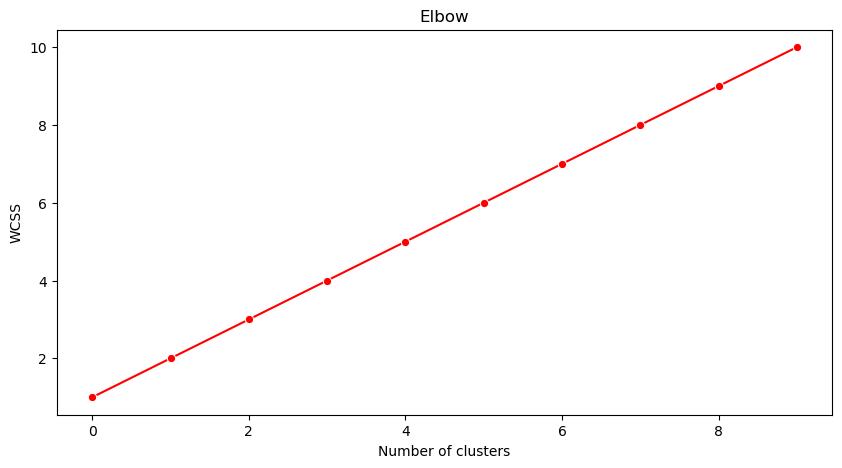

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()